# 第二章　単位住戸の一次エネルギー消費量 / Chapter 2 Designed Primary Energy Consumption

In [1]:
import numpy as np

# 試算例

### 初期条件

In [2]:
def get_default_house():
    
    house = {
        # 基本情報
        'type': '一般住宅',
        'tatekata': '戸建住宅',
        'A_A': 120.08,
        'A_MR': 29.81,
        'A_OR': 51.34,
        'region': 6,
        'sol_region': None,
        'reference': {'result_type': '建築物エネルギー消費性能基準（H28 年 4 月以降）', 'reference_year': 'H28'},

        # 外皮
        'ENV': {"A_env": 307.51, "U_A": 0.87, "eta_A_H": 4.3, "eta_A_C": 2.8,
                'method': '当該住宅の外皮面積の合計を用いて評価する'},
        "NV_MR": 0, "NV_OR": 0,

        'r_A_ufvnt': None,
        'HEX': None,
        'underfloor_insulation': None,
        'TS': None,

        # 暖房
        'mode_H': '居室のみを暖房する方式でかつ主たる居室とその他の居室ともに温水暖房を設置する場合に該当しない場合',
        'H_MR': {'type': 'ルームエアコンディショナー', 'e_class': 'は', 'dualcompressor': False},
        'H_OR': {'type': 'ルームエアコンディショナー', 'e_class': 'は', 'dualcompressor': False},
        'H_A': None,
        'H_HS': None,

        # 冷房
        'mode_C': '居室のみを冷房する方式',
        'C_A': None,
        'C_MR': {"type": "ルームエアコンディショナー", 'e_class': 'は', 'dualcompressor': False},
        'C_OR': {'type': 'ルームエアコンディショナー', 'e_class': 'は', 'dualcompressor': False},

        # 換気
        'V': {'type': 'ダクト式第二種換気設備又はダクト式第三種換気設備',
              'input': '比消費電力', 'f_SFP': 0.40, 'N': 0.5},

        # 熱交換
        'HEX': None,

        # 給湯
        'HW': {'hw_type': 'ガス従来型給湯機', 'e_rtd': 0.704, 'e_dash_rtd': None, 'hybrid_category': None,
               'bath_function': 'ふろ給湯機(追焚あり)', 'has_bath': True, 'pipe_diameter': '上記以外',
               'kitchen_watersaving_A': False, 'kitchen_watersaving_C': False,  'shower_watersaving_A': False,
               'shower_watersaving_B': False, 'washbowl_watersaving_C': False, 'bath_insulation': False},
        
        # 照明
        'L': {'MR_installed': '設置しない', 'MR_power': None, 'MR_multi': None, 'MR_dimming': None,
              'has_OR': True, 'OR_installed': '設置しない', 'OR_power': None, 'OR_dimming': None,
              'has_NO': True, 'NO_installed': '設置しない', 'NO_power': None, 'NO_sensor': None,
              },

        # PV
        'PV': None,

        # 太陽熱
        'SHC': None,

        # コージェネ
        'CG': None

    }

    return house

### 計算

In [3]:
def calc_results(house):
    
    if __name__ == '__main__':

        from pyhees.section2_2 import calc_E_T 
        from pyhees.section2_3 import calc_E_ST
        from pyhees.section2_4 import calc_BEI
        
        house['ENV']['A_A'] = house['A_A']
        if house['HEX'] is not None:
            house['HEX']['e'] = house['V']['v_e']
        
        # 度をラジアンに変換
        if house['SHC'] is not None:
            house['SHC']['P_alpha_sp'] = np.radians(house['SHC']['P_alpha_sp']) if house['SHC']['type'] == '液体集熱式' else None
            house['SHC']['P_beta_sp'] = np.radians(house['SHC']['P_beta_sp']) if house['SHC']['type'] == '液体集熱式' else None
            house['SHC']['P_alpha'] = np.radians(house['SHC']['P_alpha']) if house['SHC']['type'] == '空気集熱式' else None
            house['SHC']['P_beta'] = tuple(np.radians(house['SHC']['P_beta'])) if house['SHC']['type'] == '空気集熱式' else None

        E_T_dict, E_dash_T_dict, E_pri_dict, E_sec_dict = calc_E_T(house)
        E_ST_dict, E_dash_ST_dict, E_std_detail = calc_E_ST(house)
        BEI = calc_BEI(E_dash_T_dict, E_dash_ST_dict, type='一般住宅')
        
        # 建築物エネルギー消費性能基準（気候風土適応住宅を除く）の端数処理前の設計値
        E_star_T_gn_du = E_T_dict['E_star_T_gn_du']
        print(f'E_T : {E_star_T_gn_du}MJ/a')
        
        # 用途別エネルギー消費量（設計値）
        for label, value in E_pri_dict.items():
            print(f'{label} : {value}MJ/a')

        # 二次エネルギー消費量
        E_E = E_sec_dict['E_E']
        E_G = E_sec_dict['E_G']
        E_K = E_sec_dict['E_K']
        UPL = E_sec_dict['UPL']
        print(f'EL:{E_E}kWh/a, GAS:{E_G}MJ/a, KER:{E_K}L/a, UPL:{UPL}MJ/a')

        # 基準値
        E_ST_gn_du_p = E_ST_dict['E_ST_gn_du_p']
        print(f'E_ST:{E_ST_gn_du_p}GJ/a')

        # 用途別エネルギー消費量（基準値）
        for label, value in E_std_detail.items():
            print(f'{label} : {value}MJ/a')

        # BEI
        BEI = BEI['BEI_gn_du']
        print('BEI:{}'.format(BEI))
        
        return E_pri_dict

### 計算条件1

- 初期条件での計算

In [4]:
house = get_default_house()
res_01 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_H_d_t_1 = 1073.002971979867 [kWh] (L_H_d_t_1 = 11859.427924442796 [MJ])
ルームエアコンディショナー E_E_H_d_t_3 = 0.0 [kWh] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_E_H_d_t_4 = 168.14066632353965 [kWh] (L_H_d_t_4 = 1693.270712742907 [MJ])
ルームエアコンディショナー E_E_H_d_t_5 = 142.86529705803406 [kWh] (L_H_d_t_5 = 1545.5855230188597 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
ルームエアコンディショナー E_G_H_d_t_1 = 0.0 [MJ] (L_H_d_t_1 = 11859.427924442796 [MJ])
ルームエアコンディショナー E_G_H_d_t_2 = 0.0 [MJ] (L_H_d_t_2 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_3 = 0.0 [MJ] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_4 = 0.0 [MJ] (L_H_d_t_4 = 

### 計算条件2

- 8地域に変更

In [5]:
house = get_default_house()
house['region'] = 8
house['mode_H'] = None
house['H_MR'] = None
house['H_OR'] = None

res_02 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 837.0939516153162 [kWh] (L_H_d_t_1 = 27772.35428474313 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 114.68644184104187 [kWh] (L_H_d_t_3 = 27772.35428474313 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 216.91585158171682 [kWh] (L_H_d_t_4 = 27772.35428474313 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 201.91726389086784 [kWh] (L_H_d_t_5 = 27772.35428474313 [MJ])
L_ba = 1033.39925
W_k = 35806.0
W_s = 58690.0
W_w = 9454.0
W_b1 = 0.0
W_b2 = 60300.0
W_ba1 = 0.0
W_dash_k = 35806.0
W_dash_s = 58690.0
W_dash_w = 9454.0
W_dash_b1 = 0.0
W_dash_b2 = 60300.0
W_dash_ba1 = 0.0
L_dash_k = 2562.4780723186636
L_dash_s = 4200.526699089857
L_dash_w = 676.7965216478829
L_dash_b1 = 0.0
L_dash_b2 = 4316.056251306345
L_dash_ba1 = 0.0
L_dash_ba2 = 1291.7490624999998
L_dashdash_k = 2562.4780723186636
L_dashdash_s = 4200.526699089857
L_dashdash_w = 676.7965216478829
L_dashdash_b1 = 0.0
L_dashdash_b2 = 4316.056251306345
L_dashdash_ba1 = 0.0
L_dashdash_ba2 = 1291.7490624999998
E_E_hs_aux1 = 35.99524731481482
E_E_hs_au

### 計算条件3

- 暖房をダクト式セントラル空調に変更

In [6]:
house = get_default_house()
house['mode_H'] = '住戸全体を連続的に暖房する方式'
house['H_A'] = {'type': 'ダクト式セントラル空調機', 'EquipmentSpec': '入力しない', 'VAV': False, 'general_ventilation': True, 
                'duct_insulation': '全てもしくは一部が断熱区画外である'}
res_03 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
E_E_hs_aux1 = 37.22433263888889
E_E_hs_aux2 = 6.513888888888888
E_E_hs_aux3 = 13.686551818865741
E_E_W = 57.42477334664352 [MJ]
E_G_W = 27076.84968318864 [MJ]
E_K_W = 0.0 [MJ]
E_M_W = 0.0 [MJ]
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh]

### 計算条件4

- 暖房の主居室のルームエアコンの効率を（い）、小能力時高効率型コンプレッサーを評価する
- 暖房のその他居室のルームエアコンの効率を（ろ）、小能力時高効率型コンプレッサーを評価する
- 冷房の主居室のルームエアコンの効率を（ろ）、小能力時高効率型コンプレッサーを評価する
- 冷房のその他居室のルームエアコンの効率を（い）、小能力時高効率型コンプレッサーを評価する

In [7]:
house = get_default_house()
house['H_MR'] = {'type': 'ルームエアコンディショナー', 'e_class': 'い', 'dualcompressor': True}
house['H_OR'] = {'type': 'ルームエアコンディショナー', 'e_class': 'ろ', 'dualcompressor': True}
house['C_MR'] = {"type": "ルームエアコンディショナー", 'e_class': 'ろ', 'dualcompressor': True}
house['C_OR'] = {'type': 'ルームエアコンディショナー', 'e_class': 'い', 'dualcompressor': True}
res_04 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 413.99443021388646 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 21.545257985059145 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 55.09486508583244 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 52.46337852863633 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_H_d_t_1 = 914.1759069819723 [kWh] (L_H_d_t_1 = 11859.427924442796 [MJ])
ルームエアコンディショナー E_E_H_d_t_3 = 0.0 [kWh] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_E_H_d_t_4 = 120.77955018949888 [kWh] (L_H_d_t_4 = 1693.270712742907 [MJ])
ルームエアコンディショナー E_E_H_d_t_5 = 103.97282552737738 [kWh] (L_H_d_t_5 = 1545.5855230188597 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
ルームエアコンディショナー E_G_H_d_t_1 = 0.0 [MJ] (L_H_d_t_1 = 11859.427924442796 [MJ])
ルームエアコンディショナー E_G_H_d_t_2 = 0.0 [MJ] (L_H_d_t_2 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_3 = 0.0 [MJ] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_4 = 0.0 [MJ] (L_H_d_t_4 = 

### 計算条件5

- 床面積の合計90m2、主たる居室25m2、その他居室45m2、外皮面積250m2に変更

In [8]:
house = get_default_house()
house["A_A"] = 90
house["A_MR"] = 25
house["A_OR"] = 40
house['ENV']["A_env"] = 250
res_05 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 353.4282260339988 [kWh] (L_H_d_t_1 = 9761.856461564474 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 34.693493768335024 [kWh] (L_H_d_t_3 = 9761.856461564474 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 83.008591431119 [kWh] (L_H_d_t_4 = 9761.856461564474 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 75.59734589887016 [kWh] (L_H_d_t_5 = 9761.856461564474 [MJ])
ルームエアコンディショナー E_E_H_d_t_1 = 1077.4151375380902 [kWh] (L_H_d_t_1 = 10503.045723020145 [MJ])
ルームエアコンディショナー E_E_H_d_t_3 = 0.0 [kWh] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_E_H_d_t_4 = 167.17042741442899 [kWh] (L_H_d_t_4 = 1393.6199054742103 [MJ])
ルームエアコンディショナー E_E_H_d_t_5 = 140.01502910723775 [kWh] (L_H_d_t_5 = 1266.7907670596944 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
ルームエアコンディショナー E_G_H_d_t_1 = 0.0 [MJ] (L_H_d_t_1 = 10503.045723020145 [MJ])
ルームエアコンディショナー E_G_H_d_t_2 = 0.0 [MJ] (L_H_d_t_2 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_3 = 0.0 [MJ] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_4 = 0.0 [MJ] (L_H_d_t_4 = 1393.

### 計算条件6

- 熱交換型換気設備の導入  
    - 換気設備を壁付け式第一種換気設備に変更
    - 有効換気量率v_eを0.95に変更
    - 比消費電力を0.25W/(m3/h)に変更
    - 温度交換効率etr_t_rawを0.90、給気と排気の比率による温度交換効率の補正係数C_balを0.88、排気過多時における住宅外皮経由の漏気による温度交換効率の補正係数C_leakを0.93に変更

In [9]:
house = get_default_house()
house['V']['type'] = '壁付け式第一種換気設備'
house['V']['v_e'] = 0.95
house['V']['f_SFP'] = 0.25
house['HEX'] = {'etr_t': 0.90, 'C_bal': 0.88, 'C_leak': 0.93}
res_06 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_H_d_t_1 = 933.0520908983568 [kWh] (L_H_d_t_1 = 9792.644672211178 [MJ])
ルームエアコンディショナー E_E_H_d_t_3 = 0.0 [kWh] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_E_H_d_t_4 = 152.4259160781694 [kWh] (L_H_d_t_4 = 1373.0457727087003 [MJ])
ルームエアコンディショナー E_E_H_d_t_5 = 128.36710582044338 [kWh] (L_H_d_t_5 = 1244.9863240811587 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
ルームエアコンディショナー E_G_H_d_t_1 = 0.0 [MJ] (L_H_d_t_1 = 9792.644672211178 [MJ])
ルームエアコンディショナー E_G_H_d_t_2 = 0.0 [MJ] (L_H_d_t_2 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_3 = 0.0 [MJ] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_4 = 0.0 [MJ] (L_H_d_t_4 = 13

### 計算条件7

- 主たる居室、その他居室にパネルラジエーターを採用
- 熱源機を電気ヒートポンプ・ガス瞬間式併用型給湯温水暖房機(給湯熱源：電気ヒートポンプ・ガス瞬間式併用、暖房熱源：電気ヒートポンプ・ガス瞬間式併用)（区分1）に変更

In [10]:
house = get_default_house()
house['H_MR'] = {'type': '温水暖房用パネルラジエーター'}
house['H_OR'] = {'type': '温水暖房用パネルラジエーター'}
house['H_HS'] = {'type': '電気ヒートポンプ・ガス瞬間式併用型給湯温水暖房機(給湯熱源：電気ヒートポンプ・ガス瞬間式併用、暖房熱源：電気ヒートポンプ・ガス瞬間式併用)', 'pipe_insulation': False, 'underfloor_pipe_insulation': False}
house['HW']['hw_type'] = '電気ヒートポンプ・ガス瞬間式併用型給湯温水暖房機(給湯熱源：電気ヒートポンプ・ガス瞬間式併用、暖房熱源：電気ヒートポンプ・ガス瞬間式併用)'
house['HW']['hybrid_category'] = '区分1'
res_07 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
温水暖房用パネルラジエーター E_E_rad_d_t_1 = 0.0 [KWh] (L_T_H_rad_d_t_1 = 13369.716326035541 [MJ])
温水暖房用パネルラジエーター E_E_rad_d_t_3 = 0.0 [KWh] (L_T_H_rad_d_t_3 = 4975.1037042428225 [MJ])
温水暖房用パネルラジエーター E_E_rad_d_t_4 = 0.0 [KWh] (L_T_H_rad_d_t_4 = 3457.1898249005208 [MJ])
温水暖房用パネルラジエーター E_E_rad_d_t_5 = 0.0 [KWh] (L_T_H_rad_d_t_5 = 4367.067897449638 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
電気ヒートポンプ・ガス瞬間式併用型給湯温水暖房機(給湯熱源：電気ヒートポンプ・ガス瞬間式併用、暖房熱源：電気ヒートポンプ・ガス瞬間式併用) E_G_hs = 0.0 [MJ] (L_T_H_rad = 26169.07775262852 [MJ])
電気ヒートポンプ・ガス瞬間式併用型給湯温水暖房機(給湯熱源：電気ヒートポンプ・ガス瞬間式併用、暖房熱源：電気ヒートポンプ・ガス瞬間式併用) E_K_hs = 0.0 [MJ] (L_T_H_rad = 26169.077752

### 計算条件8

- 液体集熱式の太陽熱温水器を導入

In [11]:
house = get_default_house()
house['sol_region'] = 3
house['SHC'] = {'type' : '液体集熱式', 'A_sp' : 5, 'P_alpha_sp' : 0, 'P_beta_sp' : 30, 'ls_type' : '太陽熱温水器', 'W_tnk_ss': None}
res_08 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_H_d_t_1 = 1073.002971979867 [kWh] (L_H_d_t_1 = 11859.427924442796 [MJ])
ルームエアコンディショナー E_E_H_d_t_3 = 0.0 [kWh] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_E_H_d_t_4 = 168.14066632353965 [kWh] (L_H_d_t_4 = 1693.270712742907 [MJ])
ルームエアコンディショナー E_E_H_d_t_5 = 142.86529705803406 [kWh] (L_H_d_t_5 = 1545.5855230188597 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
ルームエアコンディショナー E_G_H_d_t_1 = 0.0 [MJ] (L_H_d_t_1 = 11859.427924442796 [MJ])
ルームエアコンディショナー E_G_H_d_t_2 = 0.0 [MJ] (L_H_d_t_2 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_3 = 0.0 [MJ] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_4 = 0.0 [MJ] (L_H_d_t_4 = 

### 計算条件9

- 空気集熱式の太陽熱温水器

In [12]:
house = get_default_house()
house['sol_region'] = 3
house['SHC'] = {'type': '空気集熱式', 'P_alpha': 0, 'fan_sso': False, 'fan_type': 'AC', 'V_fan_P0': 30, 
                'hotwater_use': False, 'pump_sso': False, 'W_tnk_ass': None, 'supply_target': '居室',
                'r_A_ufvnt_ass': None, 'ufv_insulation': None, 
                # 集熱器群
                'A_col': (3,), 'P_beta': (30,), 'd0': (0.1,), 'd1': (2.0,), 'm_fan_test': (0.0107,)
                }
res_09 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_H_d_t_1 = 1072.7991811232991 [kWh] (L_H_d_t_1 = 11854.915859626297 [MJ])
ルームエアコンディショナー E_E_H_d_t_3 = 0.0 [kWh] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_E_H_d_t_4 = 167.9750543622024 [kWh] (L_H_d_t_4 = 1692.8600809314867 [MJ])
ルームエアコンディショナー E_E_H_d_t_5 = 142.85644316020515 [kWh] (L_H_d_t_5 = 1544.886773010761 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 3.9120000000000004 [kWh/年]
ルームエアコンディショナー E_G_H_d_t_1 = 0.0 [MJ] (L_H_d_t_1 = 11854.915859626297 [MJ])
ルームエアコンディショナー E_G_H_d_t_2 = 0.0 [MJ] (L_H_d_t_2 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_3 = 0.0 [MJ] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_4 = 0.0 [MJ

### 計算条件10

- 主たる居室の暖房設備をパネルラジエーターに変更
- SOFC1を導入

In [13]:
house = get_default_house()
house['H_MR'] = {'type': '温水暖房用パネルラジエーター'}
house['H_HS'] = {'type': 'コージェネレーションを使用する', 'pipe_insulation': False, 'underfloor_pipe_insulation': False}
house['HW']['hw_type'] = 'コージェネレーションを使用する'
house['CG'] = {'CG_category': 'SOFC1'}
res_10 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
温水暖房用パネルラジエーター E_E_rad_d_t_1 = 0.0 [KWh] (L_T_H_rad_d_t_1 = 13369.716326035541 [MJ])
ルームエアコンディショナー E_E_H_d_t_3 = 0.0 [kWh] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_E_H_d_t_4 = 168.14066632353965 [kWh] (L_H_d_t_4 = 1693.270712742907 [MJ])
ルームエアコンディショナー E_E_H_d_t_5 = 142.86529705803406 [kWh] (L_H_d_t_5 = 1545.5855230188597 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
コージェネレーションを使用する E_G_hs = 0.0 [MJ] (L_T_H_rad = 16608.57256179731 [MJ])
ルームエアコンディショナー E_G_H_d_t_2 = 0.0 [MJ] (L_H_d_t_2 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_3 = 0.0 [MJ] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_4 = 0.0 [MJ] (L_H_d_t_4 = 1693.2707

### 計算条件11

- 主たる居室の暖房設備をパネルラジエーターに変更
- コージェネレーション機器の指定（品番を指定する）に変更
    - ブランド事業者名:	パナソニック株式会社アプライアンス社
    - 発電ユニット番号:	FC-70LR1PZ
    - 貯湯ユニット品番:	FC-NULR1PZ
    - 補助熱源機品番:	-
    - 成績証明書番号または自己適合宣言書番号: JHIA20-010-040-005-1



In [14]:
house = get_default_house()
house['H_MR'] = {'type': '温水暖房用パネルラジエーター'}
house['H_HS'] = {'type': 'コージェネレーションを使用する', 'pipe_insulation': False, 'underfloor_pipe_insulation': False}
house['HW']['hw_type'] = 'コージェネレーションを使用する'
house['CG'] = {'exhaust': True, 
               'exhaust_priority': '給湯優先',
                'type_BB_HWH': 'G_EJ',  
                'r_DHW_gen_PU_d': 0.7842,
                'r_HWH_gen_PU_d': 0.0966,
                'PU_type': '熱主', 
                'param_E_E_gen_PU_Evt_d': {'a_PU': 0.0000, 'a_DHW': 0.0870, 'a_HWH': 0.0870, 'b': 22.6283, 'c': 0.9722},  
                'param_E_F_PU_HVt_d': {'a_DHW': 1, 'a_HWH': 1}, 
                'param_r_H_gen_PU_HVt_d': {'a_DHW': 0.00000, 'a_HWH': 0.00000, 'b': 1.09776}, 
                'param_e_E_PU_d': {'a_PU': 0.000000, 'a_DHW': 0.000111, 'a_HWH': 0.000111, 'b': 0.3024, 'e_E_PU_d_max': 0.3269, 'e_E_PU_d_min': 0.2964}, 
                'param_e_H_PU_d': {'a_PU': 0.000000, 'a_DHW': -0.000182, 'a_HWH': 0.000000, 'b': 0.5088, 'e_H_PU_d_max': 0.5178, 'e_H_PU_d_min': 0.4892}, 
                'P_rtd_PU': 700, 
                'P_TU_aux_DHW': 5.2, 
                'P_TU_aux_HWH': 106.6, 
                'reverse': False 
                }


res_11 = calc_results(house)

ルームエアコンディショナー E_E_C_d_t_1 = 361.2629254290829 [kWh] (L_H_d_t_1 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_3 = 50.008284301710674 [kWh] (L_H_d_t_3 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_4 = 107.81837383530751 [kWh] (L_H_d_t_4 = 11645.656066138205 [MJ])
ルームエアコンディショナー E_E_C_d_t_5 = 99.35164379396548 [kWh] (L_H_d_t_5 = 11645.656066138205 [MJ])
温水暖房用パネルラジエーター E_E_rad_d_t_1 = 0.0 [KWh] (L_T_H_rad_d_t_1 = 13369.716326035541 [MJ])
ルームエアコンディショナー E_E_H_d_t_3 = 0.0 [kWh] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_E_H_d_t_4 = 168.14066632353965 [kWh] (L_H_d_t_4 = 1693.270712742907 [MJ])
ルームエアコンディショナー E_E_H_d_t_5 = 142.86529705803406 [kWh] (L_H_d_t_5 = 1545.5855230188597 [MJ])
空気集熱式太陽熱利用設備の補機の消費電力量のうちの暖房設備への付加分 E_E_aux_ass = 0.0 [kWh/年]
コージェネレーションを使用する E_G_hs = 0.0 [MJ] (L_T_H_rad = 16608.57256179731 [MJ])
ルームエアコンディショナー E_G_H_d_t_2 = 0.0 [MJ] (L_H_d_t_2 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_3 = 0.0 [MJ] (L_H_d_t_3 = 0.0 [MJ])
ルームエアコンディショナー E_G_H_d_t_4 = 0.0 [MJ] (L_H_d_t_4 = 1693.2707

## 設計一次エネルギー消費量の比較

In [15]:
def draw_graph(df, x_columns,colors,x_range):

  import matplotlib.pyplot as plt
  import matplotlib.patheffects as pe 

  left_columns ,right_columns = x_columns
  left_colors,right_colors = colors

  # 1行2列のグラフを作成
  fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5),sharey='row',dpi=150)

  # 区分名
  axNameArr = list(df.index)

  # MJ -> GJに変換
  df_GJ = df / 1000

  # 左側のグラフ
  acc = np.zeros(len(df_GJ))
  for colum,color in reversed(list(zip(left_columns ,left_colors))):
    s = df_GJ[colum]
    ax[0].barh(axNameArr,s,left=acc,color=color,label=colum)
    acc+=s

  # 右側のグラフ
  acc = np.zeros(len(df_GJ))
  for colum,color in zip(right_columns,right_colors):
    s = df_GJ[colum]
    ax[1].barh(axNameArr,s,left=acc,color=color,label=colum)
    acc+=s

  # 凡例
  ha,la = ax[0].get_legend_handles_labels()
  ax[0].legend(reversed(ha),reversed(la),bbox_to_anchor=(0.95, 1.05), loc='lower right',ncol=len(left_columns), borderaxespad=0,frameon=False)
  ax[1].legend(bbox_to_anchor=(0.05, 1.05), loc='lower left',ncol=len(right_columns), borderaxespad=0,frameon=False)
  ax[0].set_xlabel('self-consumption[GJ/a]')
  ax[1].set_xlabel('demand[GJ/a]')
  fig.align_labels() # ラベルの位置を揃える

  ax[0].set_xlim(x_range[0],0) # 左側グラフはX軸を反転
  ax[1].set_xlim(0,x_range[1])

  fig.subplots_adjust(wspace=0.0) # 左右のグラフの間隔をゼロに設定 
  
  plt.show()


In [16]:
import pandas as pd
DBdict = {'testcase1': res_01, 'testcase2': res_02, 'testcase3': res_03, 'testcase4': res_04, 'testcase5': res_05, 'testcase6': res_06,
          'testcase7': res_07, 'testcase8': res_08, 'testcase9': res_09, 'testcase10': res_10, 'testcase11': res_11}
DB_ene = pd.DataFrame(DBdict).T
DB_ene

,E_H,E_C,E_V,E_L,E_W,E_S,E_S_CG,E_R,E_M
testcase1,13935.004845,6035.986379,5938.505695,5211.890117,27637.315471,0.000000,0.000000,0.0,21240.608512
testcase2,0.000000,13377.187847,5938.505695,5211.890117,19730.539537,0.000000,0.000000,0.0,21240.608512
testcase3,36310.327997,6035.986379,5938.505695,5211.890117,27637.315471,0.000000,0.000000,0.0,21240.608512
testcase4,11543.017675,5300.635814,5938.505695,5211.890117,27637.315471,0.000000,0.000000,0.0,21240.608512
testcase5,13878.503253,5336.061934,4451.407851,3525.616458,24536.403413,0.000000,0.000000,0.0,19811.355200
testcase6,12078.298266,6035.986379,4084.042232,5211.890117,27637.315471,0.000000,0.000000,0.0,21240.608512
testcase7,1.154054,6035.986379,5938.505695,5211.890117,46891.400120,0.000000,0.000000,0.0,21240.608512
testcase8,13935.004845,6035.986379,5938.505695,5211.890117,18612.603402,0.000000,0.000000,0.0,21240.608512
testcase9,13969.494179,6035.986379,5938.505695,5211.890117,27637.315471,0.000000,0.000000,0.0,21240.608512
testcase10,3042.364959,6035.986379,5938.505695,5211.890117,66610.025989,30901.359466,30901.359466,0.0,21240.608512


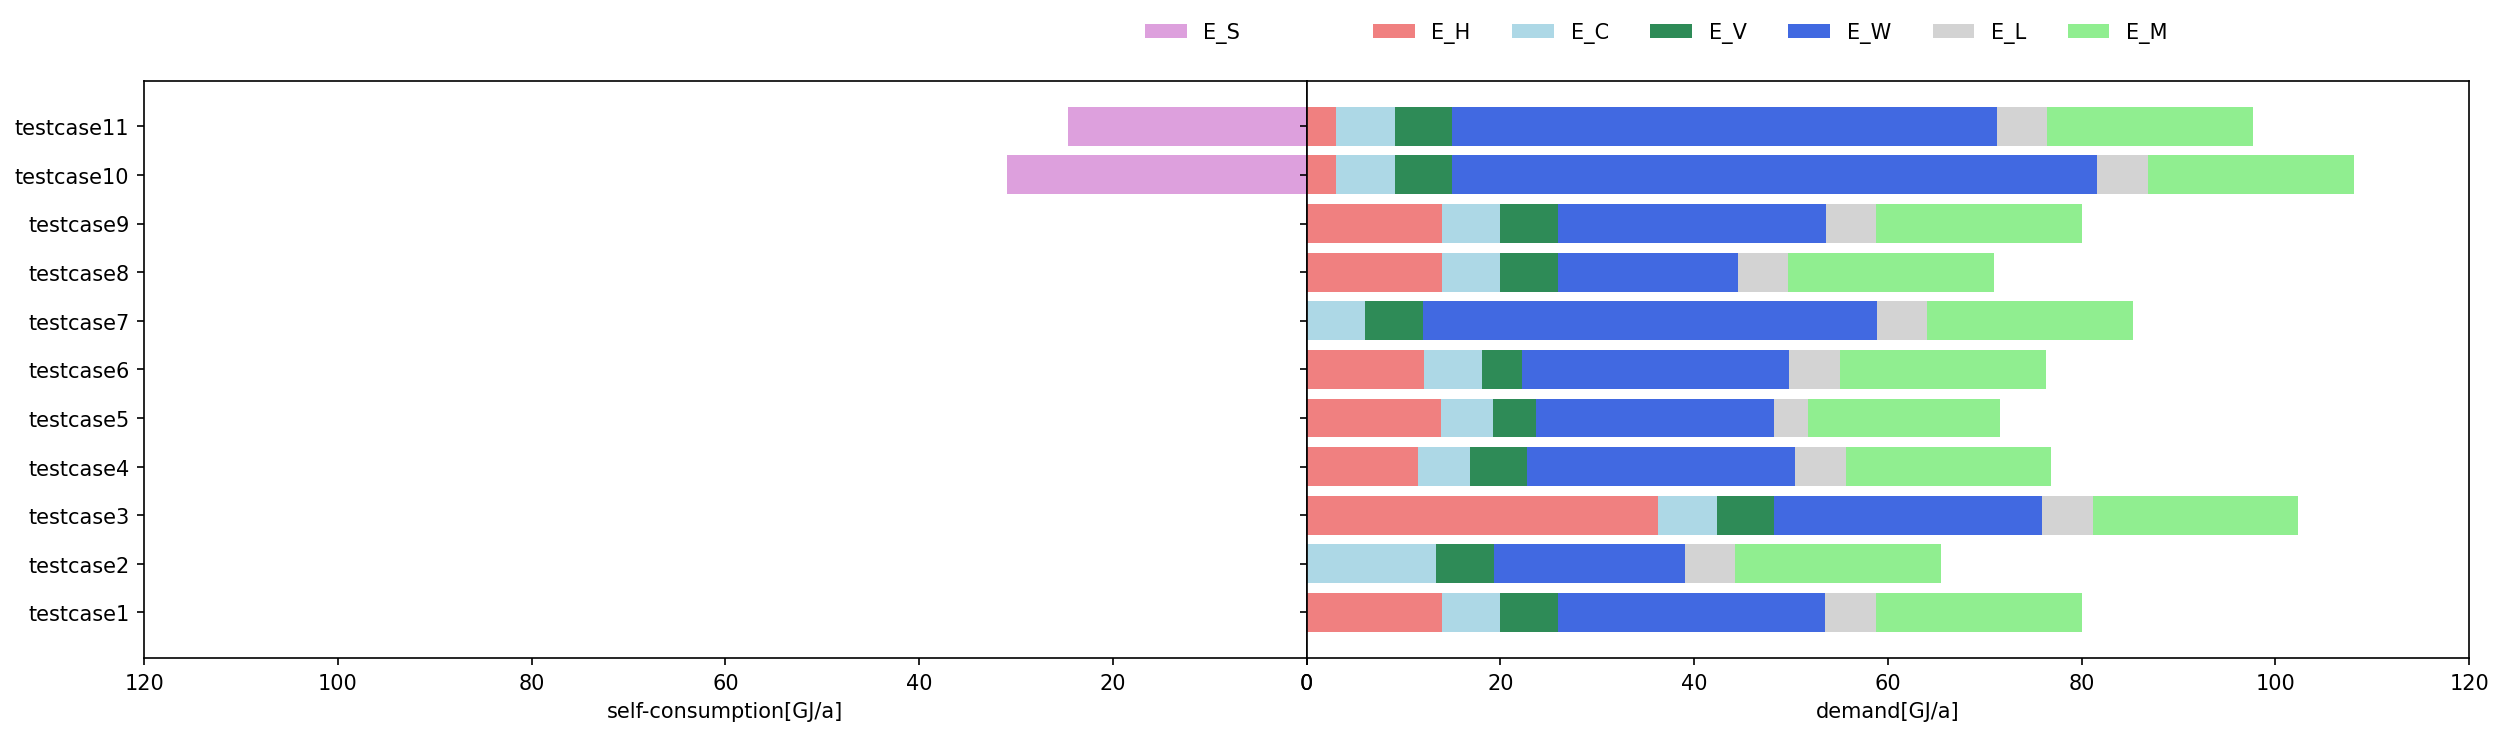

In [17]:
myColors = [['plum'],['lightcoral', 'lightblue', 'seagreen', 'royalblue', 'lightgray', 'lightgreen']]
myColumns = [['E_S'],["E_H", "E_C", "E_V", "E_W", "E_L", "E_M"]]

draw_graph(DB_ene, myColumns, myColors ,[120,120])